<a href="https://colab.research.google.com/github/5655530/AIFFEL_CORE_QUEST/blob/main/2_1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Step 1. 데이터셋 내려받기**

In [15]:
import tensorflow_datasets as tfds
import tensorflow as tf

(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

## **Step 2. 데이터셋 준비하기**

In [16]:
IMG_SIZE = 160

def format_example(image, label):
    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

## **Step 3. 모델 설계하기**

In [17]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMG_SIZE, IMG_SIZE, 3),
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(5, activation='softmax')
])

## **Step 4. 모델 학습시키기**

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_batches,
                    epochs=10,
                    validation_data=validation_batches)

Epoch 1/10
92/92 [==============================] - 90s 863ms/step - loss: 0.6842 - accuracy: 0.7565 - val_loss: 0.4364 - val_accuracy: 0.8583
Epoch 2/10
92/92 [==============================] - 67s 709ms/step - loss: 0.3452 - accuracy: 0.8893 - val_loss: 0.3673 - val_accuracy: 0.8883
Epoch 3/10
92/92 [==============================] - 65s 697ms/step - loss: 0.2623 - accuracy: 0.9125 - val_loss: 0.3318 - val_accuracy: 0.8883
Epoch 4/10
92/92 [==============================] - 64s 685ms/step - loss: 0.2173 - accuracy: 0.9346 - val_loss: 0.3227 - val_accuracy: 0.8910
Epoch 5/10
92/92 [==============================] - 60s 647ms/step - loss: 0.1811 - accuracy: 0.9479 - val_loss: 0.3185 - val_accuracy: 0.8856
Epoch 6/10
92/92 [==============================] - 62s 674ms/step - loss: 0.1568 - accuracy: 0.9588 - val_loss: 0.3067 - val_accuracy: 0.8965
Epoch 7/10
92/92 [==============================] - 61s 648ms/step - loss: 0.1375 - accuracy: 0.9670 - val_loss: 0.3094 - val_accuracy: 0.8992

## **Step 5. 모델 성능 평가하기**

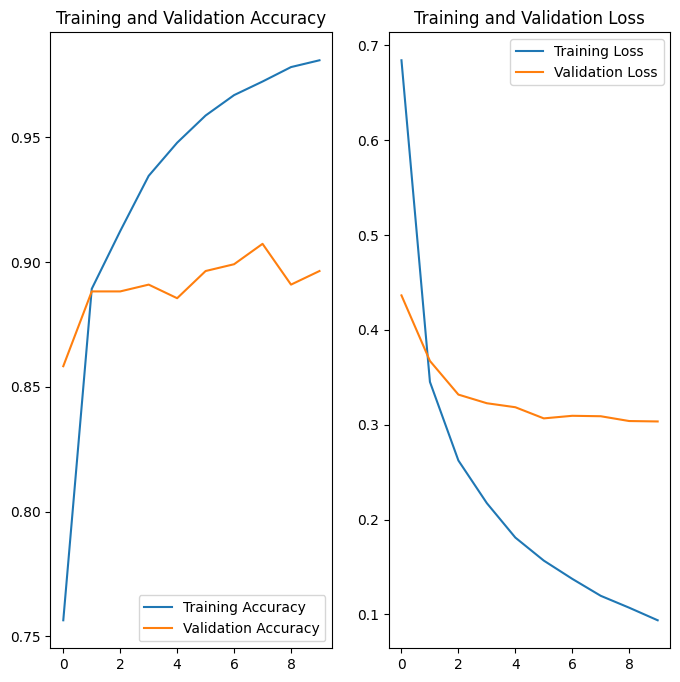

In [19]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## **Step 6. 모델 활용하기**

1/1 [==============================] - 2s 2s/step
Predicted class: 2
True class: 4


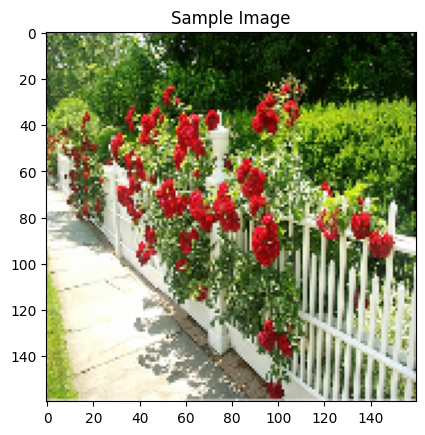

In [21]:
# 테스트 배치에서 이미지와 라벨 가져오기
sample_image_batch, sample_label_batch = next(iter(test_batches.take(1)))

# 예측을 위한 첫 번째 이미지 가져오기
sample_image = sample_image_batch[0]

# 해당 이미지의 라벨 가져오기
sample_label = sample_label_batch[0].numpy()

# 이미지에 대한 예측 수행
prediction = model.predict(tf.expand_dims(sample_image, 0))

# 결과 출력하기
print("Predicted class:", tf.argmax(prediction[0]).numpy())
print("True class:", sample_label)

# 이미지 시각화하기
plt.figure()
plt.imshow((sample_image + 1) / 2)  # 이미지를 [-1, 1]에서 [0, 1]로 정규화하여 시각화
plt.title("Sample Image")
plt.show()